No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
/home/sacevedo/my_env/lib64/python3.8/site-packages/jax/_src/numpy/lax_numpy.py:146: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  return asarray(x, dtype=self.dtype)


Text(0, 0.5, '$r^*/N$')

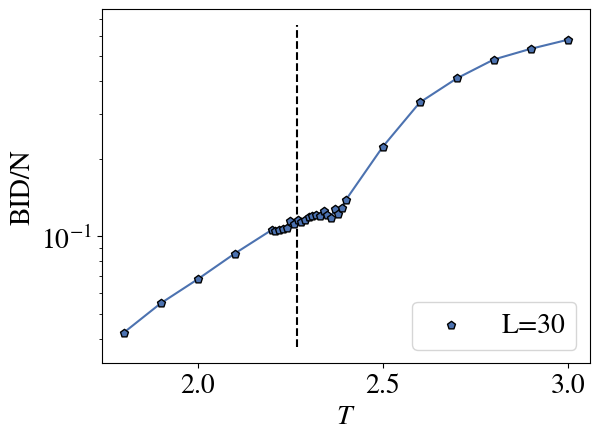

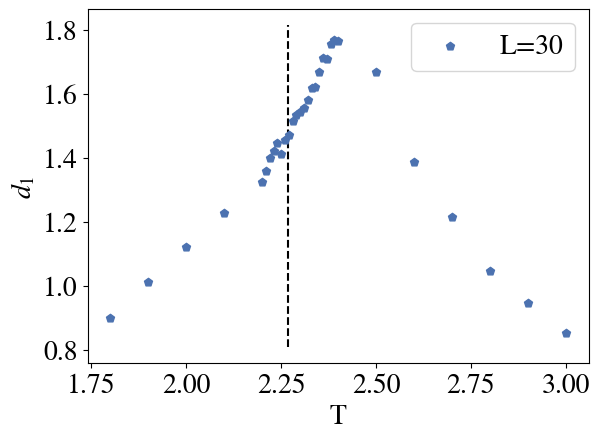

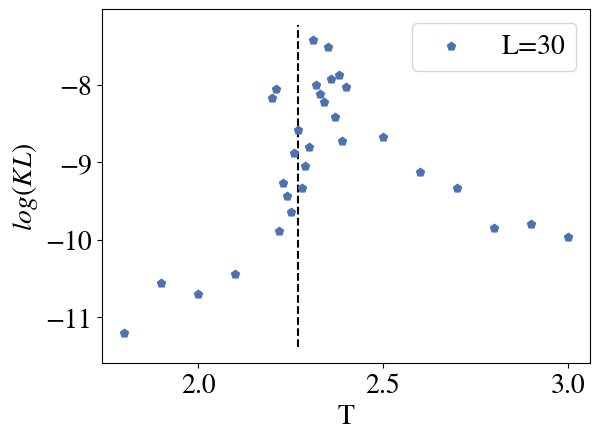

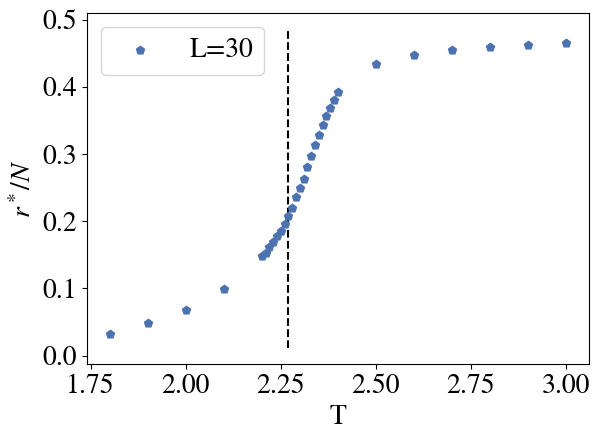

In [1]:
import matplotlib.pyplot as plt
import os,sys
import numpy as np
from dadapy._utils.stochastic_minimization_hamming import *
sys.path.append('../../')
from paths import *


rcpsize = 20
plt.rcParams['xtick.labelsize']= rcpsize
plt.rcParams['ytick.labelsize']=rcpsize
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = rcpsize
plt.rcParams.update({'figure.autolayout': True})
#colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['ggplot']['axes.prop_cycle'].by_key()['color']
colors = plt.style.library['seaborn-v0_8']['axes.prop_cycle'].by_key()['color']
# colors = plt.style.library['seaborn-v0_8-dark-palette']['axes.prop_cycle'].by_key()['color']
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)
# print(plt.rcParams.keys())
#np.set_printoptions(precision=None)
markers = ['p','o','h','^','s']
plot_id = 0


# outputfolder = f'results/data/'
# os.makedirs(outputfolder,exist_ok=True)
histfolder = f'../distances/results/hist/'
figsfolder = f'results/figs/'
os.makedirs(figsfolder,exist_ok=True)
eps = 1E-7
metric = 'hamming'
crossed_distances = 0

L_list = np.array([30],dtype=int)
T_list = np.arange(1.8,2.2+eps,.1)
T_list = np.concatenate((T_list,
                         np.arange(2.21,2.39+eps,.01))
                         )
T_list = np.concatenate((T_list,
                         np.arange(2.4,3+eps,.1)
                         )
                         )
Ns = 5000
Nsteps = int(1E6)
delta = 5E-4
N_list = L_list**2
alphamin = 0#1E-3
plot_id = 0


fig,ax = plt.subplots(1)
figa,axa = plt.subplots(1)
figkl,axkl = plt.subplots(1)
figr,axr = plt.subplots(1)

log_scale = 1
plot_id = 0
start = 0
seed_list = list(range(1,1+1))
alphamax_list = np.array([.1])
sigma_list = np.empty(shape=(len(T_list),
                            len(L_list),
                            len(seed_list),
                            len(alphamax_list),
                            ),
                      )
logKL_list = np.empty(shape=sigma_list.shape)
alpha_list = np.empty(shape=sigma_list.shape)
rmax_list = np.empty(shape=sigma_list.shape)

for T_id,T in enumerate(T_list):
  for L_id,L in enumerate(L_list):
    for seed_id,seed in enumerate(seed_list):
      for alphamax_id,alphamax in enumerate(alphamax_list):
        H = Hamming(crossed_distances=crossed_distances)
        H.D_histogram(
                      T=T,
                      L=L,
                      Ns=Ns,
                      resultsfolder=histfolder,
                      )
        optfolder0 = f'results/opt/L{L}/T{T:.2f}/'
        B = BID(H,
                alphamin=alphamin,
                alphamax=alphamax,
                seed=seed,
                delta=delta,
                Nsteps=Nsteps,
                optfolder0=optfolder0,
                )
        (rmax_list[T_id,L_id,seed_id,alphamax_id],
        sigma_list[T_id,L_id,seed_id,alphamax_id],
        alpha_list[T_id,L_id,seed_id,alphamax_id],
        logKL_list[T_id,L_id,seed_id,alphamax_id],) = B.load_results()

for L_id, L in enumerate(L_list):                                            
  lbl = f'{L=}'
  ax.scatter(T_list,
           sigma_list[:,L_id,seed_id,alphamax_id]/L**2,
           edgecolors='black',
           marker=markers[plot_id],
           color=colors[plot_id],
           label=lbl,
           )
  ax.plot(T_list,
           sigma_list[:,L_id,seed_id,alphamax_id]/L**2,
           '-',
           color=colors[plot_id],
           zorder=0,
           )
  axa.scatter(T_list,
           alpha_list[:,L_id,seed_id,alphamax_id],
           marker=markers[plot_id],
           color=colors[plot_id],
           label=lbl,
           )
  axkl.scatter(T_list,
           logKL_list[:,L_id,seed_id,alphamax_id],
           marker=markers[plot_id],
           color=colors[plot_id],
           label=lbl,
           )
  axr.scatter(T_list,
           rmax_list[:,L_id,seed_id,alphamax_id]/L**2,
           marker=markers[plot_id],
           color=colors[plot_id],
           label=lbl,
           )
  plot_id += 1
ax.set_ylabel(f"BID/N")
ax.set_xlabel(r'$T$')
if log_scale:
  ax.set_yscale('log')
  # ax.set_xscale('log')
# ax.grid(True)
ax.vlines(2.269,
          ax.get_ylim()[0],
          ax.get_ylim()[1],
          linestyles='dashed',
          color='black',
          zorder=0)
axa.vlines(2.269,
          axa.get_ylim()[0],
          axa.get_ylim()[1],
          linestyles='dashed',
          color='black',
          zorder=0)
axr.vlines(2.269,
          axr.get_ylim()[0],
          axr.get_ylim()[1],
          linestyles='dashed',
          color='black',
          zorder=0)
axkl.vlines(2.269,
          axkl.get_ylim()[0],
          axkl.get_ylim()[1],
          linestyles='dashed',
          color='black',
          zorder=0)

ax.legend(loc='lower right')
fig.savefig(figsfolder+f'Square-Td0.pdf',bbox_inches='tight')


axa.legend()
axa.set_xlabel(f'T')
axa.set_ylabel(r'$d_1$')
# figa.savefig(figsfolder+f'Ta.pdf',bbox_inches='tight')

axkl.legend()
axkl.set_xlabel(f'T')
axkl.set_ylabel(r'$log{(KL)}$')
# figkl.savefig(figsfolder+f'Tkl.pdf',bbox_inches='tight')

axr.legend()
axr.set_xlabel(f'T')
axr.set_ylabel(r'$r^*/N$')
# figr.savefig(figsfolder+f'Tr.pdf',bbox_inches='tight')